In [1]:
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1QrQ5Qqr-w4Qx-WPToDHrvFxM9iyS7O1N'
df = pd.read_csv(url)

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


In [2]:
print('Average Quality: ' + str(df['quality'].mean())) 
print('maximum level of residual sugar: ' + str(df['residual sugar'].mean())) 
print('minimum level of residual sugar: ' + str(df['residual sugar'].mean()))

Average Quality: 5.6360225140712945
maximum level of residual sugar: 2.5388055034396517
minimum level of residual sugar: 2.5388055034396517


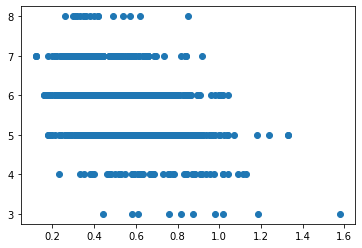

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

X = pd.DataFrame(df['volatile acidity'])
y = pd.DataFrame(df['quality'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
#print(scores)

plt.scatter(df['volatile acidity'], df['quality'])

#nlen = df['volatile acidity'].count
#X = df['volatile acidity'].values.reshape(nlen,1)
#y = pd.DataFrame(df['quality'])
#reg = LinearRegression().fit(X.iloc[train,:], Y.iloc[train,:])

In [4]:
#Ytar = pd.DataFrame(df['quality'])
Xsrc = pd.DataFrame(df.drop(['quality'],1))

model1 = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model1.fit(Xsrc.iloc[train,:], y.iloc[train,:])
 score = model1.score(Xsrc.iloc[test,:],y.iloc[test,:])
 scores.append(score)
#print(scores)

from sklearn import metrics
y_predall = model1.predict(Xsrc)
y_pred = model.predict(X)
print('Mean Squared error of one column: ' + str(metrics.mean_squared_error(y,y_pred)))
print('Mean Squared error of all column: ' + str(metrics.mean_squared_error(y,y_predall)))
#print(metrics.mean_squared_error(y,y_pred))
#print(metrics.mean_squared_error(y,y_predall))

Mean Squared error of one column: 0.5525750322735792
Mean Squared error of all column: 0.4202661173846115
